In [65]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt

def create_Lap(edgelist,n):
    """
    this function creates the Laplacian Matrix
    
    Argument: edgelist, number of entry in the row and column
    
    Return: Laplacian Matrix
    """
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L
def plot_eigenval(eigvalue):
    n = np.size(eigvalue)
    num_eigval = np.linspace(1, n, n)
    val_eigval = np.sort(eigvalue)
    plt.plot(num_eigval, val_eigval)
    plt.show()

n = 100
edgelist = [[i,i+1] for i in range(n-1)] #chain graph
W = create_Lap(edgelist,n)
# transform numpy.matrix or array to scipy sparse matrix
sL = sparse.csr_matrix(W)

def find_eigvectors(eigvalue, eigvec, p, q):
    sort_eigvec = eigvec[:, eigvalue.argsort()]
    vec1 = sort_eigvec[:, p-1]
    vec2 = sort_eigvec[:, q-1]
    return (vec1, vec2)
def plot_eigenvec(eigvalue, eigvec, p, q):
    second_vec, third_vec = find_eigvectors(eigvalue, eigvec, p, q)
    plt.scatter(second_vec, third_vec)
    plt.show()

In [69]:

(eigvalue, eigvec) = sparse.linalg.eigs(sL)
eigvalue

array([ 3.99901312+0.j,  3.99605346+0.j,  3.99112393+0.j,  3.98422940+0.j,
        3.97537668+0.j,  3.96457450+0.j])

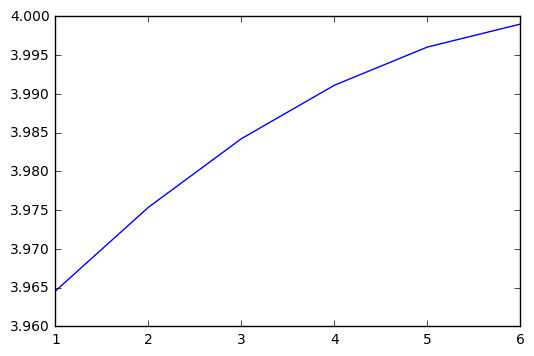

In [70]:
sort_eigvec = eigvec[:, eigvalue.argsort()]
plot_eigenval(eigvalue)

In [73]:
eigvec.shape

(100, 6)

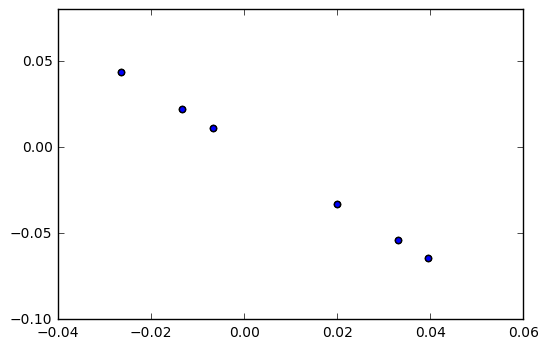

In [75]:
plt.scatter(eigvec[1], eigvec[2])
plt.show()